In [20]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import feather
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt

In [21]:
dv_uex_190401_filtrado_personas = pd.read_csv('./../datasets_editados/dv_uex_190401_procesada.csv',sep='|')

In [22]:
dv_historial_contratos_190411 = pd.read_csv('./../datasets_editados/dv_historial_contratos_190411_procesada.csv',sep='|')

In [23]:
dv_erasmus_180108_2005a2012_filtrado_persona = pd.read_csv('./../datasets_editados/dv_erasmus_180108_2005a2012_filtrado_persona_procesada.csv',sep='|')

In [24]:
dv_idiomas_190411 = pd.read_csv('./../datasets_editados/dv_idiomas_190411_procesada.csv',sep='|')

In [25]:
dv_uex_190401_filtrado_personas.head()

,id,tipo_studio,titulacion,dni,sexo,fnac,municipio_familiar,centro_secundaria,orden_preinscripcion,tipo_acceso,subtipo_acceso,num_estudios,fecha_inicio,fecha_fin,edad_fin,duracion_studio,curso_inicio,curso_fin,total
0,36957,Grado,GRADO EN EDUCACIÓN PRIMARIA,19a9b555a1c6b860c9c68039d1a3ff9d36a49ec3c2b67e...,M,1993-03-27,SALVALEÓN,I.E.S VIRGEN DE SOTERRAÑO,3.0,Selectividad,LOE (Grados),2,2011-01-09,2014-01-08,21,3,2011-12,2014-15,1
1,37041,Grado,GRADO EN EDUCACIÓN PRIMARIA,8adf6e032c747e87ffcd7ac9ccf885d653c6b689071f9a...,M,2000-07-08,ALDEA DEL CANO,I.E.S. EL BROCENSE,1.0,Selectividad,LOE (Grados),1,2012-01-09,2014-01-08,26,2,2012-13,2014-15,1
2,24088,Primer y segundo ciclo,ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. C...,73a526034466484b0e207f81f45b455d844822bf20442e...,M,1988-09-08,BADAJOZ,NaN,1.0,Selectividad,LOGSE,1,2006-01-09,2011-01-08,23,5,2006-07,2011-12,1
3,29263,Primer y segundo ciclo,INGENIERO QUÍMICO,2fa7d47d08dea2cc0b6deb109d0fa0964ac0093f40ec46...,M,1989-09-14,MONTIJO,NaN,1.0,Selectividad,LOGSE,1,2007-01-09,2012-01-08,23,5,2007-08,2012-13,1
4,5679,Primer y segundo ciclo,INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EX...,74477b74079d34e19f4a3d4a1b6e5bbdd6bd3ac1e77fab...,M,1982-12-26,TRUJILLO,NaN,2.0,Selectividad,Otros (sin especificar),2,2002-01-09,2007-01-08,25,5,2002-03,2007-08,1


In [26]:
dv_historial_contratos_190411.head()

,dni,cod_tipo,descripcion,fecha_inicio,fecha_fin,tipologia,cno_cod,cno_desc,actividad_economica_cod,actividad_economica_desc,seccion_economica,sector,localidad_cod,famprof_id,id,duracion_contrato_dias,total,estudios,edad_inicio_contrato
0,e84f231536b1ad08b01ff8506ff2317bf0c2c460b02fa8...,402,EVENTUAL A TIEMPO COMPLETO CIRCUNSTANCIAS DE L...,2010-07-25,2010-07-25,TEMPORAL,2630,TECNICOS DE EMPRESAS Y ACTIVIDADES TURISTICAS,77,Actividades de alquiler,ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILI...,SERVICIOS,6015.0,FCO,103833,1.0,1,t,31
1,28c55e81e8ac34e4ce37fc04d4a519822969e9dc0de41b...,502,EVENTUAL A TIEMPO PARCIAL CIRCUNSTANCIAS DE LA...,2017-11-28,2017-11-28,TEMPORAL,5824,AZAFATOS DE TIERRA,78,Actividades relacionadas con el empleo,ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILI...,SERVICIOS,6015.0,FCO,499104,1.0,1,t,23
2,03dda4db89262c831360c859cd18b68b2b44ba7e3c3806...,402,EVENTUAL A TIEMPO COMPLETO CIRCUNSTANCIAS DE L...,2006-03-28,2006-03-28,TEMPORAL,5824,AZAFATOS DE TIERRA,52,Almacenamiento y actividades anexas al transporte,TRANSPORTE Y ALMACENAMIENTO,SERVICIOS,6015.0,FCO,455531,1.0,1,t,22
3,9b91cc5cd1b11d613160c96159a1a5d3d6eba44052a656...,502,EVENTUAL A TIEMPO PARCIAL CIRCUNSTANCIAS DE LA...,2017-03-26,2017-03-26,TEMPORAL,5120,CAMAREROS ASALARIADOS,56,Servicios de comidas y bebidas,HOSTELERÍA,SERVICIOS,6015.0,HOT,243872,1.0,1,t,25
4,ea980973d9987081ee700a7ea8d241ef8eb36e3abe767b...,502,EVENTUAL A TIEMPO PARCIAL CIRCUNSTANCIAS DE LA...,2016-06-05,2016-06-05,TEMPORAL,5120,CAMAREROS ASALARIADOS,56,Servicios de comidas y bebidas,HOSTELERÍA,SERVICIOS,10139.0,HOT,364314,1.0,1,t,23


In [27]:
dv_erasmus_180108_2005a2012_filtrado_persona.head()

,id,curso,dni,edad,sexo,nacionalidad,area_estudio,titulacion,nivel_estudio,anos_estudio_previo_erasmus,...,aprendizaje_idioma_anfitrion,idioma_de_formacion_recibida,participacion_previa_erasmus,cualificacion_obtenida_en_pais_acogida,eilc_sms_beca,eilc_smp_beca,eilc_sms_duracion,estudios_pais,pais_destino,total
0,1271,2008/2009,2a35e7f13bdc6ea7a04b251463adceb86ca3d77d57dc23...,22,H,ES,"723 - Enfermería, obstetricia y fisioterapia",DIPLOMADO EN ENFERMERIA,1D - Diplomatura,2.0,...,S,IT,N,N,NaN,NaN,NaN,IT - Italy,IT - Italy,1
1,1993,2010/2011,491fc9b9628d9f43fb1e27960707dcb0ed7bbd3b3e066a...,20,H,ES,6 - Agricultura y veterinaria,INGENIERO AGRONOMO,1L - Licenciatura,3.0,...,S,PT,N,N,NaN,NaN,NaN,PT - Portugal,PT - Portugal,1
2,2489,2011/2012,7ba6ff8737892c3c68870ff9dd6fa626866a9ab97ca326...,21,M,ES,524 - Química y procesos,INGENIERO QUIMICO,1L - Licenciatura,4.0,...,S,IT,N,O,NaN,NaN,NaN,IT - Italy,IT - Italy,1
3,1382,2009/2010,ed88535b7d9c133936ac4f096578eaf10d9b64a3cfc118...,20,M,ES,314 - Economía,LICENCIADO EN ECONOMIA,1L - Licenciatura,3.0,...,S,IT,N,N,NaN,NaN,NaN,IT - Italy,IT - Italy,1
4,1253,2008/2009,64bed883fa25ed89bd7b810be60ca5f3f6559700f475fd...,20,M,ES,21 - Artes,LICENCIADO EN HISTORIA DEL ARTE,1L - Licenciatura,3.0,...,S,IT,N,N,NaN,NaN,NaN,IT - Italy,IT - Italy,1


In [28]:
dv_idiomas_190411.head()

,dni,idioma,ano_estudio,id
0,8a75a56fc482cecccfbb89c2abb62a48518be7dc812553...,Inglés,2009,5
1,722ebb88df30735c6d6e0c77500af2832276b7f8c43566...,Inglés,2014,8
2,9ebf83f4e7ac99fecb1d8822030462ba13ca2e727106b4...,Inglés,2014,11
3,17ba2d93e41e3ebcd71f2137e4ef0bef950576ba3edc8e...,Inglés,2016,12
4,33ce3b19da97c9bb7537a5ad12afbb1415c947db9bb293...,Inglés,2016,26


### Data preparation of dv_uex_190401_filtrado_personas

In [29]:
dv_uex_190401_filtrado_personas.dtypes

id                        int64
tipo_studio              object
titulacion               object
dni                      object
sexo                     object
fnac                     object
municipio_familiar       object
centro_secundaria        object
orden_preinscripcion    float64
tipo_acceso              object
subtipo_acceso           object
num_estudios              int64
fecha_inicio             object
fecha_fin                object
edad_fin                  int64
duracion_studio           int64
curso_inicio             object
curso_fin                object
total                     int64
dtype: object

In [30]:
categoricalCols = ['tipo_studio','titulacion','sexo','municipio_familiar','centro_secundaria','tipo_acceso','subtipo_acceso','orden_preinscripcion','curso_inicio','curso_fin']

In [31]:
dateCols = ['fnac','fecha_inicio','fecha_fin']

In [32]:
for col in categoricalCols:
    dv_uex_190401_filtrado_personas[col] = dv_uex_190401_filtrado_personas[col].astype('category')
for col in dateCols:
    dv_uex_190401_filtrado_personas[col] = pd.to_datetime(dv_uex_190401_filtrado_personas[col])
dv_uex_190401_filtrado_personas.dtypes

id                               int64
tipo_studio                   category
titulacion                    category
dni                             object
sexo                          category
fnac                    datetime64[ns]
municipio_familiar            category
centro_secundaria             category
orden_preinscripcion          category
tipo_acceso                   category
subtipo_acceso                category
num_estudios                     int64
fecha_inicio            datetime64[ns]
fecha_fin               datetime64[ns]
edad_fin                         int64
duracion_studio                  int64
curso_inicio                  category
curso_fin                     category
total                            int64
dtype: object

In [33]:
dv_uex_190401_filtrado_personas.head()

,id,tipo_studio,titulacion,dni,sexo,fnac,municipio_familiar,centro_secundaria,orden_preinscripcion,tipo_acceso,subtipo_acceso,num_estudios,fecha_inicio,fecha_fin,edad_fin,duracion_studio,curso_inicio,curso_fin,total
0,36957,Grado,GRADO EN EDUCACIÓN PRIMARIA,19a9b555a1c6b860c9c68039d1a3ff9d36a49ec3c2b67e...,M,1993-03-27,SALVALEÓN,I.E.S VIRGEN DE SOTERRAÑO,3.0,Selectividad,LOE (Grados),2,2011-01-09,2014-01-08,21,3,2011-12,2014-15,1
1,37041,Grado,GRADO EN EDUCACIÓN PRIMARIA,8adf6e032c747e87ffcd7ac9ccf885d653c6b689071f9a...,M,2000-07-08,ALDEA DEL CANO,I.E.S. EL BROCENSE,1.0,Selectividad,LOE (Grados),1,2012-01-09,2014-01-08,26,2,2012-13,2014-15,1
2,24088,Primer y segundo ciclo,ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. C...,73a526034466484b0e207f81f45b455d844822bf20442e...,M,1988-09-08,BADAJOZ,NaN,1.0,Selectividad,LOGSE,1,2006-01-09,2011-01-08,23,5,2006-07,2011-12,1
3,29263,Primer y segundo ciclo,INGENIERO QUÍMICO,2fa7d47d08dea2cc0b6deb109d0fa0964ac0093f40ec46...,M,1989-09-14,MONTIJO,NaN,1.0,Selectividad,LOGSE,1,2007-01-09,2012-01-08,23,5,2007-08,2012-13,1
4,5679,Primer y segundo ciclo,INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EX...,74477b74079d34e19f4a3d4a1b6e5bbdd6bd3ac1e77fab...,M,1982-12-26,TRUJILLO,NaN,2.0,Selectividad,Otros (sin especificar),2,2002-01-09,2007-01-08,25,5,2002-03,2007-08,1


<IPython.core.display.Javascript object>


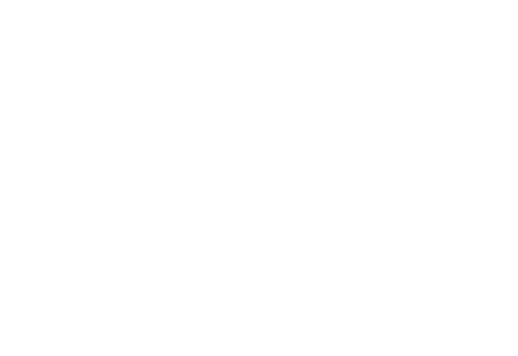

<IPython.core.display.Javascript object>


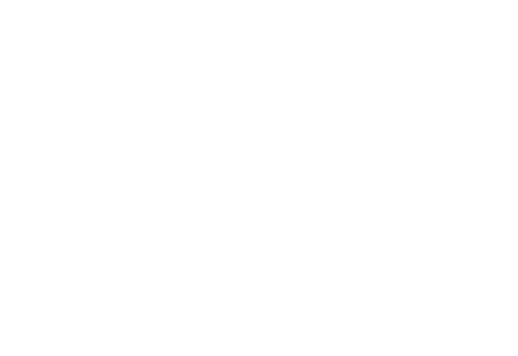

<IPython.core.display.Javascript object>


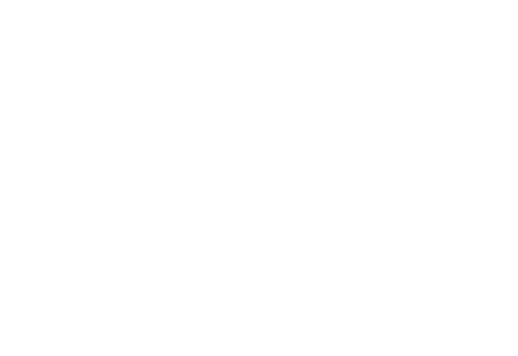

<IPython.core.display.Javascript object>


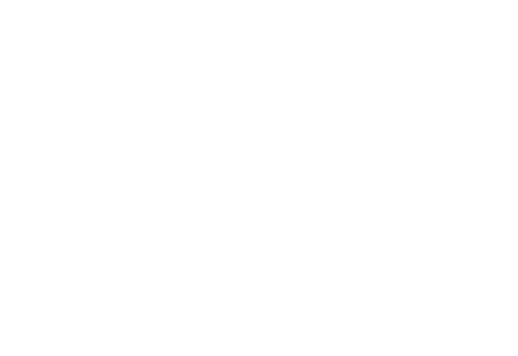

<IPython.core.display.Javascript object>


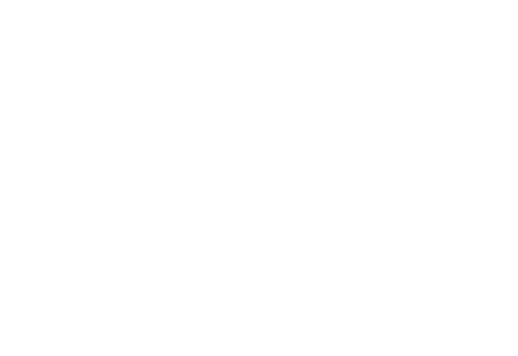

<IPython.core.display.Javascript object>


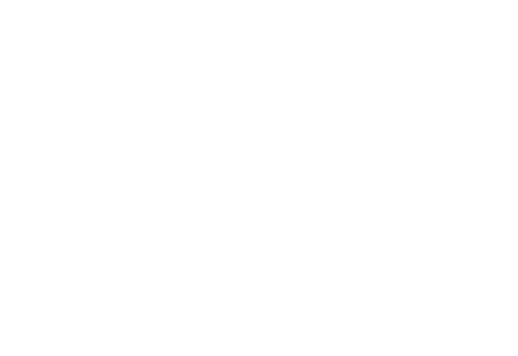

<IPython.core.display.Javascript object>


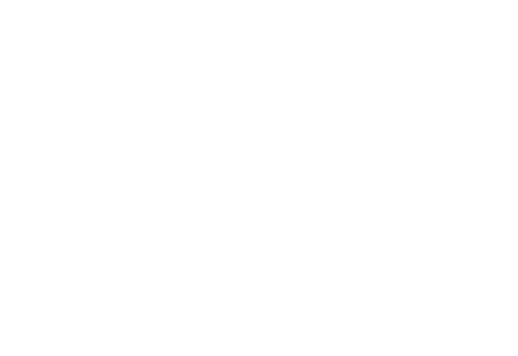

<IPython.core.display.Javascript object>


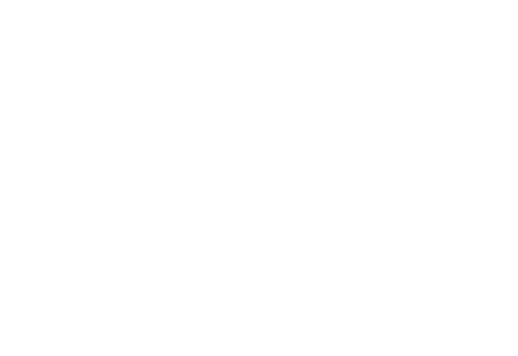

<IPython.core.display.Javascript object>


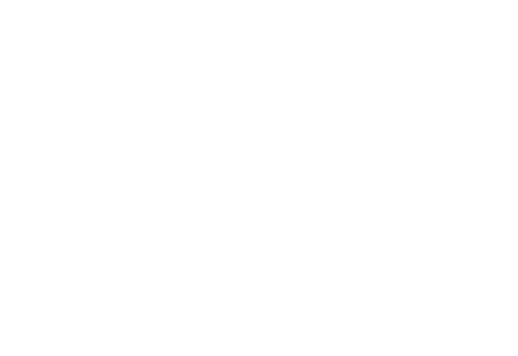

<IPython.core.display.Javascript object>


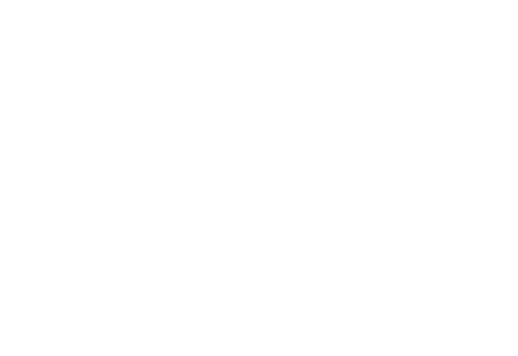

<IPython.core.display.Javascript object>


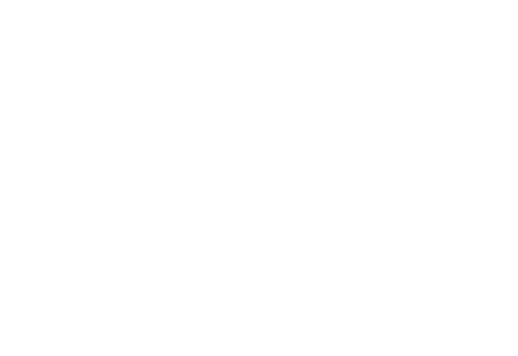

<IPython.core.display.Javascript object>


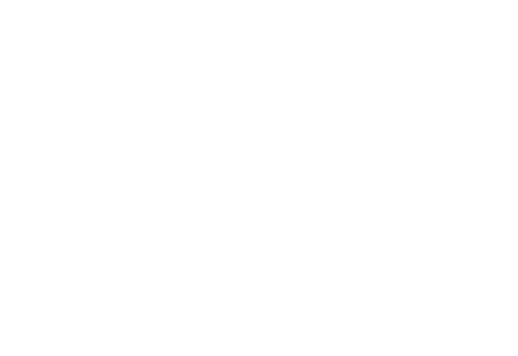

<IPython.core.display.Javascript object>


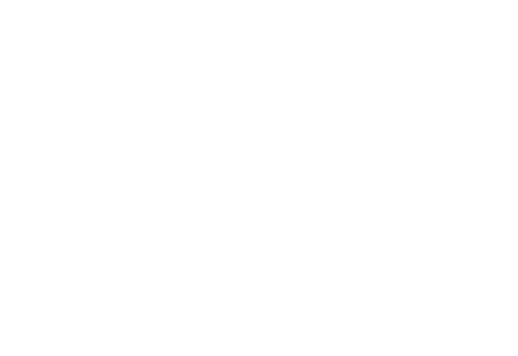

<IPython.core.display.Javascript object>


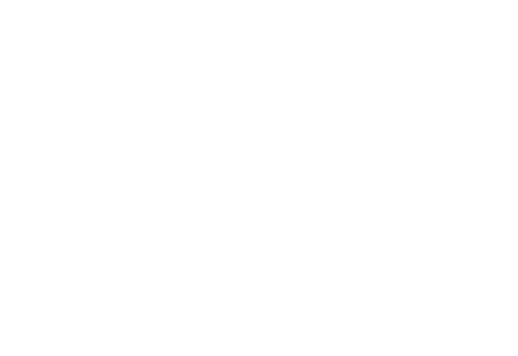

<IPython.core.display.Javascript object>


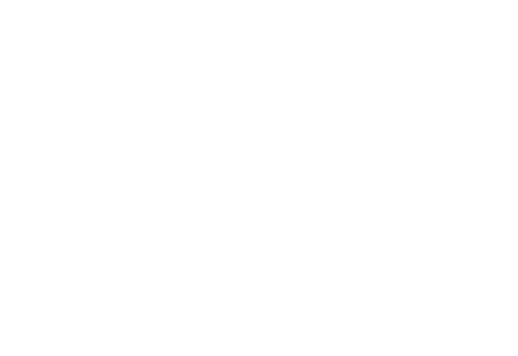

<IPython.core.display.Javascript object>


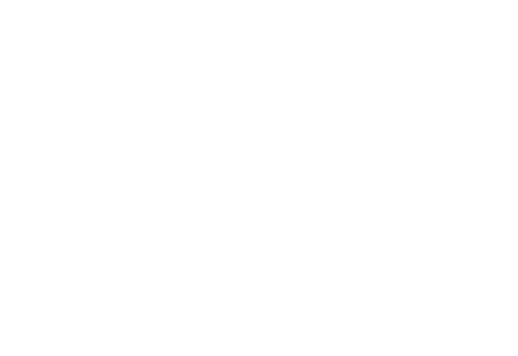

AssertionError: Number of manager items must equal union of block items
# manager items: 19, # tot_items: 20

In [15]:
prof_dv_uex_190401_filtrado_personas_procesada = ProfileReport(dv_uex_190401_filtrado_personas)
prof_dv_uex_190401_filtrado_personas_procesada.to_file('profile_dv_uex_190401_filtrado_personas_procesada.html')

In [ ]:
prof_dv_uex_190401_filtrado_personas_procesada

In [34]:
dv_uex_190401_filtrado_personas_clean_columns = dv_uex_190401_filtrado_personas.copy()

In [35]:
dv_uex_190401_filtrado_personas_clean_columns.drop('centro_secundaria', axis = 1, inplace = True)
dv_uex_190401_filtrado_personas_clean_columns.drop('orden_preinscripcion', axis = 1, inplace = True)


In [36]:
dv_uex_190401_filtrado_personas_clean_columns_rows = dv_uex_190401_filtrado_personas_clean_columns.dropna(axis = 0, inplace = True)

In [37]:
dv_uex_190401_filtrado_personas_clean_columns.shape

(26534, 17)

In [38]:
dv_uex_190401_filtrado_personas_clean_columns_rows = dv_uex_190401_filtrado_personas_clean_columns.copy()

In [39]:
dv_uex_190401_filtrado_personas_clean_columns_rows.dropna(axis = 0, inplace = True)

In [40]:
dv_uex_190401_filtrado_personas_clean_columns_rows.shape

(26534, 17)

In [41]:
dv_uex_190401_filtrado_personas_clean = dv_uex_190401_filtrado_personas_clean_columns_rows.copy()

In [42]:
dv_uex_190401_filtrado_personas_clean['municipio_familiar']= dv_uex_190401_filtrado_personas_clean['municipio_familiar'].cat.add_categories(["Otro municipio"])

In [43]:
dv_uex_190401_filtrado_personas_clean['municipio_familiar'].cat.categories

Index(['A CORUÑA', 'ABADÍA', 'ABERTURA', 'ACEBO', 'ACEDERA', 'ACEHÚCHE',
       'ACEITUNA', 'ACEUCHAL', 'AFGANISTAN', 'AGUDO',
       ...
       'ZARZA DE GRANADILLA', 'ZARZA DE MONTÁNCHEZ', 'ZARZA LA MAYOR',
       'ZARZA-CAPILLA', 'ZORITA', 'ZURBARAN', 'ÁGUILAS', 'ÁVILA', 'ÉCIJA',
       'Otro municipio'],
      dtype='object', length=721)

In [44]:
for municipio in dv_uex_190401_filtrado_personas_clean.municipio_familiar.unique():
    num_personas_municipio_x = len(dv_uex_190401_filtrado_personas_clean.loc[(dv_uex_190401_filtrado_personas_clean.municipio_familiar == municipio)].index)
    if (num_personas_municipio_x < 10):
        dv_uex_190401_filtrado_personas_clean.loc[(dv_uex_190401_filtrado_personas_clean.municipio_familiar == municipio),'municipio_familiar'] = "Otro municipio"


In [45]:
dv_uex_190401_filtrado_personas_clean['municipio_familiar'].value_counts() 

BADAJOZ           5943
CÁCERES           4238
MÉRIDA            1652
Otro municipio    1344
ALMENDRALEJO       528
                  ... 
OROPESA              0
ORPÍ                 0
OVIEDO               0
PALAZUELO            0
A CORUÑA             0
Name: municipio_familiar, Length: 721, dtype: int64

In [46]:
dv_uex_190401_filtrado_personas_clean['municipio_familiar'] = dv_uex_190401_filtrado_personas_clean['municipio_familiar'].cat.remove_unused_categories()

In [47]:
dv_uex_190401_filtrado_personas_clean['municipio_familiar'].value_counts() 

BADAJOZ               5943
CÁCERES               4238
MÉRIDA                1652
Otro municipio        1344
ALMENDRALEJO           528
                      ... 
HOYOS                   10
GALISTEO                10
MAGUILLA                10
ZORITA                  10
PUEBLA DE LA REINA      10
Name: municipio_familiar, Length: 231, dtype: int64

In [48]:
dv_uex_190401_filtrado_personas_clean['titulacion'].value_counts()

MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO EN EDUCACIÓN SECUNDARIA    1615
GRADO EN EDUCACIÓN PRIMARIA                                                  1438
GRADO EN ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS                              1208
GRADO EN ENFERMERÍA                                                          1144
DIPLOMADO EN CIENCIAS EMPRESARIALES                                          1049
                                                                             ... 
MÁSTER UNIVERSITARIO EN GESTIÓN DE LA INNOVACIÓN TECNOLÓGICA                    1
MÁSTER UNIVERSITARIO EN DIRECCIÓN DE MARKETING                                  1
MÁSTER UNIVERSITARIO EN CIRUGÍA DE MÍNIMA INVASIÓN UROLÓGICA AVANZADA           1
LICENCIADO EN FILOSOFÍA Y LETRAS (DIVISIÓN FILOLOGÍA)                           1
PCEO: ING. EN TELEMÁTICA/ING. INFORMÁTICA TEC. INFORMACIÓN                      1
Name: titulacion, Length: 205, dtype: int64

In [49]:
dv_uex_190401_filtrado_personas_clean['titulacion']= dv_uex_190401_filtrado_personas_clean['titulacion'].cat.add_categories(["Otra titulacion"])

In [50]:
dv_uex_190401_filtrado_personas_clean['titulacion'].value_counts()

MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO EN EDUCACIÓN SECUNDARIA    1615
GRADO EN EDUCACIÓN PRIMARIA                                                  1438
GRADO EN ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS                              1208
GRADO EN ENFERMERÍA                                                          1144
DIPLOMADO EN CIENCIAS EMPRESARIALES                                          1049
                                                                             ... 
LICENCIADO EN FILOSOFÍA Y LETRAS (DIVISIÓN FILOLOGÍA)                           1
MÁSTER UNIV. ENDOSCOPIA Y CIRUGÍA DE MÍNIMA INVASIÓN EN PEQUEÑOS ANIMALES       1
MÁSTER UNIVERSITARIO EN GESTIÓN DE LA INNOVACIÓN TECNOLÓGICA                    1
MÁSTER UNIVERSITARIO EN CIRUGÍA DE MÍNIMA INVASIÓN UROLÓGICA AVANZADA           1
Otra titulacion                                                                 0
Name: titulacion, Length: 206, dtype: int64

In [51]:
for titulacion in dv_uex_190401_filtrado_personas_clean.titulacion.unique():
    num_personas_titulacion_x = len(dv_uex_190401_filtrado_personas_clean.loc[(dv_uex_190401_filtrado_personas_clean.titulacion == titulacion)].index)
    if (num_personas_titulacion_x < 10):
        dv_uex_190401_filtrado_personas_clean.loc[(dv_uex_190401_filtrado_personas_clean.titulacion == titulacion),'titulacion'] = "Otra titulacion"



In [52]:
dv_uex_190401_filtrado_personas_clean['titulacion'].value_counts()

MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO EN EDUCACIÓN SECUNDARIA     1615
GRADO EN EDUCACIÓN PRIMARIA                                                   1438
GRADO EN ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS                               1208
GRADO EN ENFERMERÍA                                                           1144
DIPLOMADO EN CIENCIAS EMPRESARIALES                                           1049
                                                                              ... 
LICENCIADO EN FILOSOFÍA Y LETRAS (DIVISIÓN FILOLOGÍA)                            0
MÁSTER UNIVERSITARIO EN COMPUTACIÓN GRID Y PARALELISMO                           0
MÁSTER UNIVERSITARIO EN GESTIÓN DE LA GANADERÍA EXTENSIVA                        0
M.U. EN GESTIÓN DE INFOR. REDES SOCIALES Y LOS PROD. DIGITALES EN INTERNET       0
MÁSTER UNIV. ENDOSCOPIA Y CIRUGÍA DE MÍNIMA INVASIÓN EN PEQUEÑOS ANIMALES        0
Name: titulacion, Length: 206, dtype: int64

In [53]:
dv_uex_190401_filtrado_personas_clean['titulacion'] = dv_uex_190401_filtrado_personas_clean['titulacion'].cat.remove_unused_categories()

In [54]:
 len (dv_uex_190401_filtrado_personas_clean.loc[(dv_uex_190401_filtrado_personas_clean.titulacion == 'Otra titulacion')].index)

97

### Data preparation of dv_historial_contratos_190411

In [37]:
dv_historial_contratos_190411.dtypes

dni                          object
cod_tipo                      int64
descripcion                  object
fecha_inicio                 object
fecha_fin                    object
tipologia                    object
cno_cod                       int64
cno_desc                     object
actividad_economica_cod       int64
actividad_economica_desc     object
seccion_economica            object
sector                       object
localidad_cod               float64
famprof_id                   object
id                            int64
duracion_contrato_dias      float64
total                         int64
estudios                     object
edad_inicio_contrato          int64
dtype: object

In [38]:
categoricalCols = ['cod_tipo','descripcion','tipologia','cno_cod','cno_desc','actividad_economica_cod','actividad_economica_desc','seccion_economica','sector','localidad_cod','famprof_id','estudios']

In [39]:
dateCols = ['fecha_inicio','fecha_fin']

In [40]:
for col in categoricalCols:
    dv_historial_contratos_190411[col] = dv_historial_contratos_190411[col].astype('category')
for col in dateCols:
    dv_historial_contratos_190411[col] = pd.to_datetime(dv_historial_contratos_190411[col])
dv_historial_contratos_190411.dtypes

dni                                 object
cod_tipo                          category
descripcion                       category
fecha_inicio                datetime64[ns]
fecha_fin                   datetime64[ns]
tipologia                         category
cno_cod                           category
cno_desc                          category
actividad_economica_cod           category
actividad_economica_desc          category
seccion_economica                 category
sector                            category
localidad_cod                     category
famprof_id                        category
id                                   int64
duracion_contrato_dias             float64
total                                int64
estudios                          category
edad_inicio_contrato                 int64
dtype: object

In [45]:
prof_dv_historial_contratos_190411_procesada = ProfileReport(dv_historial_contratos_190411)
prof_dv_historial_contratos_190411_procesada.to_file('profile_dv_historial_contratos_190411_procesada')

AssertionError: Gaps in blk ref_locs

In [ ]:
prof_dv_historial_contratos_190411_procesada

In [41]:
dv_historial_contratos_190411.shape

(171608, 19)

In [42]:
dv_historial_contratos_190411_clean = dv_historial_contratos_190411.copy()
dv_historial_contratos_190411_clean.dropna(axis = 0, inplace = True)
dv_historial_contratos_190411_clean.shape

(113576, 19)

### Data preparation of dv_erasmus_180108_2005a2012_filtrado_persona

In [43]:
dv_erasmus_180108_2005a2012_filtrado_persona.dtypes

id                                          int64
curso                                      object
dni                                        object
edad                                        int64
sexo                                       object
nacionalidad                               object
area_estudio                               object
titulacion                                 object
nivel_estudio                              object
anos_estudio_previo_erasmus               float64
tipo_movilidad                             object
institucion_acogida                        object
estudios_duracion_meses                   float64
estudios_comienzo_mes                      object
estudios_num_creditos_ects                float64
estudios_beca                             float64
practicas_pais                             object
practicas_empresa                          object
practicas_empresa_tam                      object
practicas_empresa_tipo                     object


In [44]:
categoricalCols = ['curso','sexo','nacionalidad','area_estudio','titulacion','nivel_estudio','tipo_movilidad','institucion_acogida','practicas_pais','practicas_empresa','practicas_empresa_tam','practicas_empresa_tipo','practicas_comienzo_mes','aprendizaje_idioma_anfitrion','idioma_de_formacion_recibida','participacion_previa_erasmus','cualificacion_obtenida_en_pais_acogida','estudios_pais','pais_destino']

In [45]:
for col in categoricalCols:
    dv_erasmus_180108_2005a2012_filtrado_persona[col] = dv_erasmus_180108_2005a2012_filtrado_persona[col].astype('category')
dv_erasmus_180108_2005a2012_filtrado_persona.dtypes

id                                           int64
curso                                     category
dni                                         object
edad                                         int64
sexo                                      category
nacionalidad                              category
area_estudio                              category
titulacion                                category
nivel_estudio                             category
anos_estudio_previo_erasmus                float64
tipo_movilidad                            category
institucion_acogida                       category
estudios_duracion_meses                    float64
estudios_comienzo_mes                       object
estudios_num_creditos_ects                 float64
estudios_beca                              float64
practicas_pais                            category
practicas_empresa                         category
practicas_empresa_tam                     category
practicas_empresa_tipo         

In [ ]:
prof_dv_erasmus_180108_2005a2012_filtrado_persona_procesada = ProfileReport(dv_erasmus_180108_2005a2012_filtrado_persona)
prof_dv_erasmus_180108_2005a2012_filtrado_persona_procesada.to_file('profile_dv_erasmus_180108_2005a2012_filtrado_persona_procesada')

In [34]:
prof_dv_erasmus_180108_2005a2012_filtrado_persona_procesada

NameError: name 'prof_dv_erasmus_180108_2005a2012_filtrado_persona_procesada' is not defined

In [46]:
dv_erasmus_180108_2005a2012_filtrado_persona.shape

(884, 34)

In [47]:
dv_erasmus_180108_2005a2012_filtrado_persona_clean = dv_erasmus_180108_2005a2012_filtrado_persona.copy()
dv_erasmus_180108_2005a2012_filtrado_persona_clean.drop('eilc_sms_beca', axis = 1, inplace = True)
dv_erasmus_180108_2005a2012_filtrado_persona_clean.drop('eilc_smp_beca', axis = 1, inplace = True)
dv_erasmus_180108_2005a2012_filtrado_persona_clean.drop('eilc_sms_duracion', axis = 1, inplace = True)
dv_erasmus_180108_2005a2012_filtrado_persona_clean.drop('estudios_pais', axis = 1, inplace = True)
dv_erasmus_180108_2005a2012_filtrado_persona_clean.drop('practicas_pais', axis = 1, inplace = True)
dv_erasmus_180108_2005a2012_filtrado_persona_clean.shape

(884, 29)

No se eliminan las filas con datos NaN porque al estar mezclado en el mismo dataset la movilidad por prácticas y por estudios, hay valores nulos en todas las filas, las de estudios tienen las de prácticas a nulo y viceversa

### Data preparation of dv_idiomas_190411

In [48]:
dv_idiomas_190411.dtypes

dni            object
idioma         object
ano_estudio     int64
id              int64
dtype: object

In [49]:
categoricalCols = ['idioma','ano_estudio']

In [50]:
for col in categoricalCols:
    dv_idiomas_190411[col] = dv_idiomas_190411[col].astype('category')
dv_idiomas_190411.dtypes

dni              object
idioma         category
ano_estudio    category
id                int64
dtype: object

In [ ]:
prof_dv_idiomas_190411_procesada = ProfileReport(dv_idiomas_190411)
prof_dv_idiomas_190411_procesada.to_file('profile_dv_idiomas_190411_procesada.html')

In [ ]:
prof_dv_idiomas_190411_procesada

### Importación de tabla personas

In [99]:
dv_personas_190411 = pd.read_csv('./../datasets_editados/dv_personas_190411_procesada.csv',sep='|')

In [100]:
dv_personas_190411.head()

,dni,sexo,fnac,edad,num_estudios,dias_trabajados_sin_solap,id,idiomas,erasmus,num_erasmus,num_idiomas,fecha_fin_primer_estudio,dias_trabajados_fin_titulacion,tto_pcto_dias_trabajados,periodo_dias_inicio_trabajar,edad_fin_primera_titulacion,tipo_acceso,municipio_familiar,tipo_erasmus
0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,M,1985-11-16,32,1,510.0,109805,f,f,0,0,2008-01-08,510.0,13.0,724.0,23,Selectividad,CORIA,Ninguno
1,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,M,1990-06-22,27,1,1488.0,109806,f,f,0,0,2012-01-08,1488.0,65.0,372.0,22,Selectividad,MÉRIDA,Ninguno
2,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,M,1991-01-31,27,2,555.0,36328,f,f,0,0,2012-01-08,525.0,23.0,773.0,21,Selectividad,CÁCERES,Ninguno
3,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,M,1990-02-05,28,1,648.0,7946,f,f,0,0,2014-01-08,648.0,41.0,720.0,24,Formación Profesional,ZAFRA,Ninguno
4,001ea9744dbebe6b52a671fb1f2d508e1515b681319ad7...,M,1992-04-03,26,1,NaN,53504,f,f,0,0,2013-01-08,NaN,NaN,NaN,21,Selectividad,BADAJOZ,Ninguno


In [101]:
dv_personas_190411.dtypes

dni                                object
sexo                               object
fnac                               object
edad                                int64
num_estudios                        int64
dias_trabajados_sin_solap         float64
id                                  int64
idiomas                            object
erasmus                            object
num_erasmus                         int64
num_idiomas                         int64
fecha_fin_primer_estudio           object
dias_trabajados_fin_titulacion    float64
tto_pcto_dias_trabajados          float64
periodo_dias_inicio_trabajar      float64
edad_fin_primera_titulacion         int64
tipo_acceso                        object
municipio_familiar                 object
tipo_erasmus                       object
dtype: object

Preocedo a eliminar las columnas que no voy a utilizar para el primer proceso de ML porque utilizo los atributos derivados ya calculados previamente de las mismas:

Elimino la edad y me quedo con la edad_fin_primera_titulacion

Elimino la fnac

Elimino la fecha_fin_primer_estudio


In [102]:
dv_personas_190411.drop('edad',axis = 1, inplace = True)
dv_personas_190411.drop('fnac',axis = 1, inplace = True)
dv_personas_190411.drop('fecha_fin_primer_estudio',axis = 1, inplace = True)


In [103]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus','municipio_familiar']
for col in categoricalCols:
    dv_personas_190411[col] = dv_personas_190411[col].astype('category')
dv_personas_190411.dtypes

dni                                 object
sexo                              category
num_estudios                         int64
dias_trabajados_sin_solap          float64
id                                   int64
idiomas                             object
erasmus                             object
num_erasmus                          int64
num_idiomas                          int64
dias_trabajados_fin_titulacion     float64
tto_pcto_dias_trabajados           float64
periodo_dias_inicio_trabajar       float64
edad_fin_primera_titulacion          int64
tipo_acceso                       category
municipio_familiar                category
tipo_erasmus                      category
dtype: object

In [104]:
boolCols = ['idiomas','erasmus']
for col in boolCols:
    dv_personas_190411[col] = dv_personas_190411[col].astype('bool')
dv_personas_190411.dtypes

dni                                 object
sexo                              category
num_estudios                         int64
dias_trabajados_sin_solap          float64
id                                   int64
idiomas                               bool
erasmus                               bool
num_erasmus                          int64
num_idiomas                          int64
dias_trabajados_fin_titulacion     float64
tto_pcto_dias_trabajados           float64
periodo_dias_inicio_trabajar       float64
edad_fin_primera_titulacion          int64
tipo_acceso                       category
municipio_familiar                category
tipo_erasmus                      category
dtype: object

In [105]:
dv_personas_190411.shape

(21078, 16)

In [106]:
dv_personas_190411 = dv_personas_190411.dropna(subset=['tto_pcto_dias_trabajados'])

In [107]:
dv_personas_190411.shape

(14715, 16)

Proceso de Ingeniería de características

A continuación, se proceden a eliminar las siguientes columnas para la regresión lineal por las siguientes razones:

* **num_estudios:** esta característica se elimina puesto que más adelante se incorporará a la tabla las diferentes titulaciones cursadas por una persona a lo largo de su carrera universitaria, por lo que sería redundante tener las titulaciones que ha realizado dicha persona y tener también cuantas titulaciones ha realizado, ya que de todas las titulaciones cursadas ya se puede obtener el número de titulaciones que tiene una persona.

* **dias_trabajados_fin_titulacion:** se elimina esta variable porque la variable objetivo es el tanto por ciento de dias trabajados y no el total de días
* **periodo_dias_inicio_trabajar:** se elimina esta variable ya que no se considera relevante para el proceso de ML, es obvio que cuanto mayor es el periodo de tiempo que inicio a trabajar, menos tiempo es el que trabaja
* **dias_trabajados_sin_solap:** se elimina esta variable ya quela variable objetivo es el tanto por ciento de días trabajados desde que finalizó la titulación y no el total de días trabajados en toda la vida de la persona


    

In [108]:
dv_personas_190411.drop('num_estudios',axis = 1, inplace = True)
dv_personas_190411.drop('dias_trabajados_fin_titulacion',axis = 1, inplace = True)
dv_personas_190411.drop('periodo_dias_inicio_trabajar',axis = 1, inplace = True)
dv_personas_190411.drop('dias_trabajados_sin_solap',axis = 1, inplace = True)


In [109]:
dv_personas_190411.columns

Index(['dni', 'sexo', 'id', 'idiomas', 'erasmus', 'num_erasmus', 'num_idiomas',
       'tto_pcto_dias_trabajados', 'edad_fin_primera_titulacion',
       'tipo_acceso', 'municipio_familiar', 'tipo_erasmus'],
      dtype='object')

Para el proceso de Ingeniería de Características procederemos a explorar la correlación dividiendo las características en dos conjuntos:
* **numéricas**: Para las cuales se utilizará una selección de características específica para modelos con variables de tipo numérico y salida de tipo numérico (% de días trabajados)
* **categóricas**: Para las cuales se utilizará una selección de características específica para modelos con variables categóricas de entrada y variable categórica, para lo cual será necesario dividir la variable objetivo en varios tramos de porcentajes, convirtiendo así la misma en categórica

Esta distinción nos permitirá obtener la corelación por ambos lados, la razón por la que se realiza de esta manera es porque los algoritmos para cada tipo de variables son diferentes


In [110]:
categoricalCols = ['sexo','idiomas','erasmus','tipo_acceso','municipio_familiar','tipo_erasmus','tto_pcto_dias_trabajados']
numericalCols = ['num_erasmus','num_idiomas','edad_fin_primera_titulacion','tto_pcto_dias_trabajados']

In [111]:
dv_personas_190411_categorical = dv_personas_190411[categoricalCols]

In [112]:
dv_personas_190411_categorical.head()

,sexo,idiomas,erasmus,tipo_acceso,municipio_familiar,tipo_erasmus,tto_pcto_dias_trabajados
0,M,True,True,Selectividad,CORIA,Ninguno,13.0
1,M,True,True,Selectividad,MÉRIDA,Ninguno,65.0
2,M,True,True,Selectividad,CÁCERES,Ninguno,23.0
3,M,True,True,Formación Profesional,ZAFRA,Ninguno,41.0
5,M,True,True,Acceso a Segundo Ciclo,BADAJOZ,Ninguno,41.0


#### Aplicación de Data Bining al dataset con las variables categóricas

In [113]:
tto_pcto_dias_trabajados_bucket_array = np.linspace(0,100,11)
tto_pcto_dias_trabajados_bucket_array

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [114]:
dv_personas_190411_categorical['tto_pcto_dias_trabajados'] = pd.cut(dv_personas_190411_categorical['tto_pcto_dias_trabajados'],tto_pcto_dias_trabajados_bucket_array)
dv_personas_190411_categorical.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sexo,idiomas,erasmus,tipo_acceso,municipio_familiar,tipo_erasmus,tto_pcto_dias_trabajados
0,M,True,True,Selectividad,CORIA,Ninguno,"(10.0, 20.0]"
1,M,True,True,Selectividad,MÉRIDA,Ninguno,"(60.0, 70.0]"
2,M,True,True,Selectividad,CÁCERES,Ninguno,"(20.0, 30.0]"
3,M,True,True,Formación Profesional,ZAFRA,Ninguno,"(40.0, 50.0]"
5,M,True,True,Acceso a Segundo Ciclo,BADAJOZ,Ninguno,"(40.0, 50.0]"


#### Creación de tablas de contigencias para la aplicación de Chi-squared

Definimos un array con las variables categóricas dependientes para ir almacenando estas en el mismo

In [115]:
dependent_features=[]

In [116]:
table_sexo_ttopcto = pd.crosstab(dv_personas_190411_categorical['sexo'],dv_personas_190411_categorical['tto_pcto_dias_trabajados'],margins= False)
table_idiomas_ttopcto = pd.crosstab(dv_personas_190411_categorical['idiomas'],dv_personas_190411_categorical['tto_pcto_dias_trabajados'],margins= False)
table_erasmus_ttopcto = pd.crosstab(dv_personas_190411_categorical['erasmus'],dv_personas_190411_categorical['tto_pcto_dias_trabajados'],margins= False)
table_tipo_acesso_ttopcto = pd.crosstab(dv_personas_190411_categorical['tipo_acceso'],dv_personas_190411_categorical['tto_pcto_dias_trabajados'],margins= False)
table_municipio_familiar_ttopcto = pd.crosstab(dv_personas_190411_categorical['municipio_familiar'],dv_personas_190411_categorical['tto_pcto_dias_trabajados'],margins= False)
table_tipo_erasmus_ttopcto = pd.crosstab(dv_personas_190411_categorical['tipo_erasmus'],dv_personas_190411_categorical['tto_pcto_dias_trabajados'],margins= False)


print (table_sexo_ttopcto)
print (table_idiomas_ttopcto)
print (table_erasmus_ttopcto)
print(table_tipo_acesso_ttopcto)
print(table_municipio_familiar_ttopcto)
print(table_tipo_erasmus_ttopcto)

tto_pcto_dias_trabajados  (0.0, 10.0]  (10.0, 20.0]  (20.0, 30.0]  \
sexo                                                                
H                                1181          1057           912   
M                                1809          1870          1620   

tto_pcto_dias_trabajados  (30.0, 40.0]  (40.0, 50.0]  (50.0, 60.0]  \
sexo                                                                 
H                                  631           528           434   
M                                 1210           886           592   

tto_pcto_dias_trabajados  (60.0, 70.0]  (70.0, 80.0]  (80.0, 90.0]  \
sexo                                                                 
H                                  314           197           122   
M                                  394           242           152   

tto_pcto_dias_trabajados  (90.0, 100.0]  
sexo                                     
H                                    48  
M                                  

In [117]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(table_sexo_ttopcto)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=9
[[1137.68923185 1113.71785338  963.4211154   700.49694844  538.02427219
   390.39102069  269.39263416  167.0386531   104.25647141   39.57179937]
 [1852.31076815 1813.28214662 1568.5788846  1140.50305156  875.97572781
   635.60897931  438.60736584  271.9613469   169.74352859   64.42820063]]
probability=0.950, critical=16.919, stat=59.419
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [118]:
dependent_features.append('sexo')

In [119]:
stat, p, dof, expected = chi2_contingency(table_idiomas_ttopcto)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=0
[[2990. 2927. 2532. 1841. 1414. 1026.  708.  439.  274.  104.]]
probability=0.950, critical=nan, stat=0.000
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


In [120]:
stat, p, dof, expected = chi2_contingency(table_erasmus_ttopcto)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=0
[[2990. 2927. 2532. 1841. 1414. 1026.  708.  439.  274.  104.]]
probability=0.950, critical=nan, stat=0.000
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


In [121]:
stat, p, dof, expected = chi2_contingency(table_tipo_acesso_ttopcto)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=117
[[3.29309014e+01 3.22370396e+01 2.78866363e+01 2.02761838e+01
  1.55733427e+01 1.13000351e+01 7.79768502e+00 4.83500526e+00
  3.01774816e+00 1.14542266e+00]
 [3.14626447e+00 3.07997194e+00 2.66432831e+00 1.93721501e+00
  1.48789898e+00 1.07962119e+00 7.45001754e-01 4.61943178e-01
  2.88319888e-01 1.09435286e-01]
 [1.25850579e+00 1.23198878e+00 1.06573132e+00 7.74886005e-01
  5.95159593e-01 4.31848474e-01 2.98000702e-01 1.84777271e-01
  1.15327955e-01 4.37741143e-02]
 [5.66327604e+00 5.54394949e+00 4.79579095e+00 3.48698702e+00
  2.67821817e+00 1.94331813e+00 1.34100316e+00 8.31497720e-01
  5.18975798e-01 1.96983515e-01]
 [3.35601543e+00 3.28530340e+00 2.84195019e+00 2.06636268e+00
  1.58709225e+00 1.15159593e+00 7.94668537e-01 4.92739390e-01
  3.07541214e-01 1.16730972e-01]
 [1.21236058e+02 1.18681585e+02 1.02665451e+02 7.46473518e+01
  5.73337075e+01 4.16014030e+01 2.87074009e+01 1.78002105e+01
  1.11099263e+01 4.21690635e+00]
 [1.02777973e+01 1.00612417e+01 8.70347247e+00 6.3

In [122]:
dependent_features.append('tipo_acceso')

In [123]:
stat, p, dof, expected = chi2_contingency(table_municipio_familiar_ttopcto)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=4968
[[0.20975096 0.20533146 0.17762189 ... 0.03079621 0.01922133 0.00729569]
 [0.20975096 0.20533146 0.17762189 ... 0.03079621 0.01922133 0.00729569]
 [0.20975096 0.20533146 0.17762189 ... 0.03079621 0.01922133 0.00729569]
 ...
 [0.62925289 0.61599439 0.53286566 ... 0.09238864 0.05766398 0.02188706]
 [0.41950193 0.41066293 0.35524377 ... 0.06159242 0.03844265 0.01459137]
 [0.41950193 0.41066293 0.35524377 ... 0.06159242 0.03844265 0.01459137]]
probability=0.950, critical=5133.087, stat=4436.821
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


In [124]:
stat, p, dof, expected = chi2_contingency(table_tipo_erasmus_ttopcto)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=18
[[1.30465100e+02 1.27716170e+02 1.10480814e+02 8.03298492e+01
  6.16982112e+01 4.47682918e+01 3.08927394e+01 1.91552438e+01
  1.19556647e+01 4.53791652e+00]
 [2.85135461e+03 2.79127590e+03 2.41459193e+03 1.75563339e+03
  1.34843325e+03 9.78424693e+02 6.75170256e+02 4.18643704e+02
  2.61294704e+02 9.91775517e+01]
 [8.18028762e+00 8.00792704e+00 6.92725360e+00 5.03675903e+00
  3.86853736e+00 2.80701508e+00 1.93700456e+00 1.20105226e+00
  7.49631708e-01 2.84531743e-01]]
probability=0.950, critical=28.869, stat=41.479
Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)


In [125]:
dependent_features.append('tipo_erasmus')

In [126]:
print(dependent_features)

['sexo', 'tipo_acceso', 'tipo_erasmus']


#### Segundo proceso de Ingeniería de Características para variables categóricas:

#### Comenzamos con el proceso de Ingeniería de Características para variables numéricas:

In [127]:
dv_personas_190411_numerical = dv_personas_190411[numericalCols]
dv_personas_190411_numerical.head()

,num_erasmus,num_idiomas,edad_fin_primera_titulacion,tto_pcto_dias_trabajados
0,0,0,23,13.0
1,0,0,22,65.0
2,0,0,21,23.0
3,0,0,24,41.0
5,0,0,26,41.0


In [128]:
dv_personas_190411_numerical_features = dv_personas_190411_numerical[['num_erasmus','num_idiomas','edad_fin_primera_titulacion']]
dv_personas_190411_numerical_features.head()

,num_erasmus,num_idiomas,edad_fin_primera_titulacion
0,0,0,23
1,0,0,22
2,0,0,21
3,0,0,24
5,0,0,26


In [129]:
dv_personas_190411_numerical_label = dv_personas_190411_numerical[['tto_pcto_dias_trabajados']]
dv_personas_190411_numerical_label.head()

,tto_pcto_dias_trabajados
0,13.0
1,65.0
2,23.0
3,41.0
5,41.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.04384628 0.07969743 0.87645629]


<IPython.core.display.Javascript object>


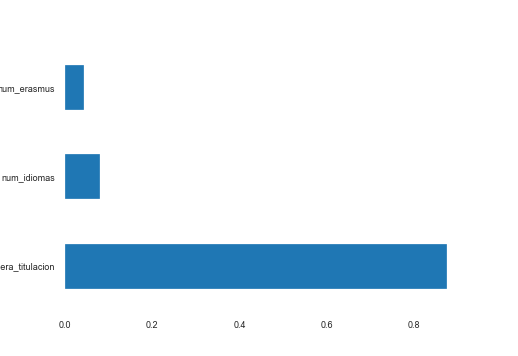

In [130]:
model = ExtraTreesClassifier()
model.fit(dv_personas_190411_numerical_features,dv_personas_190411_numerical_label)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=dv_personas_190411_numerical_features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [131]:
dependent_features.append('edad_fin_primera_titulacion')
print(dependent_features)

['sexo', 'tipo_acceso', 'tipo_erasmus', 'edad_fin_primera_titulacion']


In [132]:
dependent_features.append('tto_pcto_dias_trabajados')
dependent_features.append('dni')
dv_personas_190411_model = dv_personas_190411[dependent_features]
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...
5,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...


#### A continuación procedemos a añadir la característica de la titulación con dummies

In [133]:
for titulacion in dv_uex_190401_filtrado_personas_clean.titulacion.unique():
    dv_personas_190411_model["Titulacion_is_"+titulacion] = 0
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
dv_personas_190411_model.dtypes

sexo                                                                                         category
tipo_acceso                                                                                  category
tipo_erasmus                                                                                 category
edad_fin_primera_titulacion                                                                     int64
tto_pcto_dias_trabajados                                                                      float64
                                                                                               ...   
Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO                            int64
Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO                int64
Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA       int64
Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS   

In [135]:
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
dv_uex_190401_filtrado_personas_clean[dv_uex_190401_filtrado_personas_clean.dni.eq('1a6392217b80d649033291334d17b46c6929ff7d55c5ddc859422e7cd73aa96cb8b8fb999bc0958181339e53c6d1c7c69e7f5956dbe8815ac68fdf9a617baeda')]

,id,tipo_studio,titulacion,dni,sexo,fnac,municipio_familiar,tipo_acceso,subtipo_acceso,num_estudios,fecha_inicio,fecha_fin,edad_fin,duracion_studio,curso_inicio,curso_fin,total
3174,14881,Primer y segundo ciclo,LICENCIADO EN CIENCIAS DE LA ACTIVIDAD FÍSICA ...,1a6392217b80d649033291334d17b46c6929ff7d55c5dd...,H,1987-02-03,ALMENDRALEJO,Selectividad,LOGSE,2,2005-01-09,2009-01-08,22,4,2005-06,2009-10,1
15922,17287,Máster Universitario,MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESOR...,1a6392217b80d649033291334d17b46c6929ff7d55c5dd...,H,1987-02-03,ALMENDRALEJO,Título Universitario,Titulado universitario,2,2010-01-09,2010-01-08,23,1,2010-11,2010-11,1


In [137]:
for dni in dv_uex_190401_filtrado_personas_clean.dni.unique():
    rows_dni_x =  dv_uex_190401_filtrado_personas_clean[dv_uex_190401_filtrado_personas_clean.dni.eq(dni)]
    titulaciones_dni_x = rows_dni_x.loc[:,['titulacion']].values
    for titulacion in titulaciones_dni_x:
        dv_personas_190411_model.loc[(dv_personas_190411_model.dni == dni),"Titulacion_is_"+titulacion] = 1


In [138]:
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
dv_personas_190411_model[dv_personas_190411.dni.eq('1a6392217b80d649033291334d17b46c6929ff7d55c5ddc859422e7cd73aa96cb8b8fb999bc0958181339e53c6d1c7c69e7f5956dbe8815ac68fdf9a617baeda')].loc[:,'Titulacion_is_LICENCIADO EN CIENCIAS DE LA ACTIVIDAD FÍSICA Y DEL DEPORTE']

12078    1
Name: Titulacion_is_LICENCIADO EN CIENCIAS DE LA ACTIVIDAD FÍSICA Y DEL DEPORTE, dtype: int64

In [140]:
dv_personas_190411_model = dv_personas_190411_model[dv_personas_190411_model['tto_pcto_dias_trabajados'].notna()]

In [141]:
dv_personas_190411_model.shape

(14715, 189)

In [142]:
import feather
feather.write_dataframe(dv_personas_190411_model,'dv_personas_190411_previo_linear_regression')

In [143]:
pingfInfoFilePath = './dv_personas_190411_previo_linear_regression'
dv_personas_190411_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Procedemos a obtener las dummies de sexo, tipo_acceso y tipo_erasmus

In [144]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [145]:
dv_personas_190411_model_one_hot = pd.get_dummies(data=dv_personas_190411_model,columns=categoricalCols)

In [146]:
dv_personas_190411_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [147]:
dv_personas_190411_model_one_hot.drop(['dni'],axis=1,inplace = True)

### Comenzamos con Regresión Lineal

In [148]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [149]:
Features_1_2 = dv_personas_190411_model_one_hot.iloc[:,0:1]
Features_2_2 = dv_personas_190411_model_one_hot.iloc[:,2:]
labels = dv_personas_190411_model_one_hot['tto_pcto_dias_trabajados']

In [150]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[23,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       

In [151]:
Features.shape

(14715, 204)

In [152]:
labels = np.array(labels)
labels[:10]

array([13., 65., 23., 41., 41., 12., 17., 78., 17., 48.])

In [153]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [154]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [155]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 6.45995315e-01 -5.97973095e+00 -6.62482617e+00  2.08627519e+00
  9.18602596e-01 -3.89359974e+00  5.14272286e+00 -3.33693948e+00
 -2.21240089e+00 -2.09965592e+00  1.67519013e+00 -5.27798019e+00
  4.60598003e-01  2.37724392e+00  3.17338216e-01 -2.12234800e+00
 -6.08806482e+00 -4.66687324e+00  1.99965434e+00 -9.20968189e+00
 -5.23233956e+00 -8.96372100e+00 -5.96332146e+00 -2.69474374e+00
 -1.02807447e+01  1.09945519e+01 -1.39110539e+00 -8.55651629e+00
 -7.05427134e+00  2.66428148e+00 -8.25651326e+00  9.31685465e-01
  6.85662078e-01 -3.88979855e+00 -8.60999885e+00  6.09780559e+00
 -1.60360316e+00 -9.70895319e+00  5.86504223e+00  1.95843802e+00
 -1.20103112e+00 -4.37657792e+00  2.26664052e+00 -1.87068056e+00
 -4.75683155e+00  2.24252875e+00 -5.47419864e-01  5.70717899e-01
  1.15244204e+00  3.12564239e+00 -1.64696532e+00  1.16761681e+00
 -4.35387831e+00  8.93958540e+00 -1.16780587e+01  1.29876671e+00
 -7.40831512e+00 -7.46590434e+00  2.10937894e+00  2.35127655e+00
  6.30983257e-01 -1.1

In [156]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 332.75301176592336
Root Mean Square Error = 18.241518899640003
Mean Absolute Error    = 14.495142030715943
Median Absolute Error  = 11.648078918457031
R^2                    = 0.056849262305707415
Adjusted R^2           = -2.065239897506451


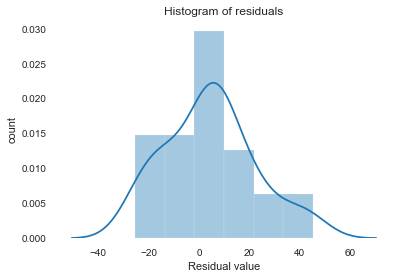

In [157]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

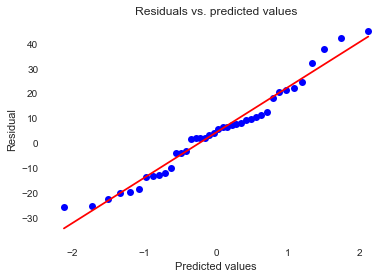

In [158]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

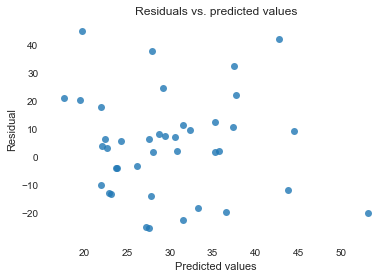

In [159]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

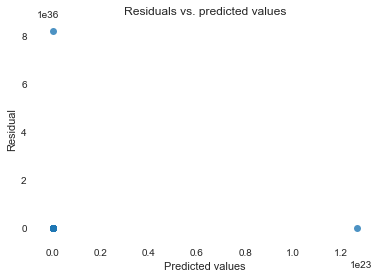

In [160]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

#### Procedo a eliminar la característica "tipo_erasmus" y vuelvo a probar:

In [162]:
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
dv_personas_190411_model_2 = dv_personas_190411_model.copy()
dv_personas_190411_model_2.drop(['tipo_erasmus'],axis=1,inplace = True) 
dv_personas_190411_model_2.drop(['dni'],axis=1,inplace = True) 

In [166]:
categoricalCols = ['sexo','tipo_acceso']

In [167]:
dv_personas_190411_model_2_one_hot = pd.get_dummies(data=dv_personas_190411_model_2,columns=categoricalCols)

In [169]:
dv_personas_190411_model_2_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_ACCESO DOCTORADO (RD 99/2011),tipo_acceso_Acceso a Segundo Ciclo,tipo_acceso_COU sin selectividad,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario
0,23,13.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,21,23.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,24,41.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,26,41.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [170]:
Features_1_2 = dv_personas_190411_model_2_one_hot.iloc[:,0:1]
Features_2_2 = dv_personas_190411_model_2_one_hot.iloc[:,2:]
labels = dv_personas_190411_model_2_one_hot['tto_pcto_dias_trabajados']

In [171]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[23,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0],
       [22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,

In [172]:
Features.shape

(14715, 201)

In [173]:
labels = np.array(labels)
labels[:10]

array([13., 65., 23., 41., 41., 12., 17., 78., 17., 48.])

In [174]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [175]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [176]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 6.50442441e-01 -6.04846669e+00 -6.74940001e+00  1.68858487e+00
  5.69518456e-01 -3.89571360e+00  4.94051399e+00 -3.38104547e+00
 -2.26105138e+00 -2.21919478e+00  1.57176359e+00 -5.58046049e+00
  4.76077203e-01  2.35893975e+00  2.24450103e-04 -2.41093705e+00
 -6.29849463e+00 -5.08303468e+00  1.28972685e+00 -9.39624159e+00
 -5.29288899e+00 -9.33435600e+00 -6.61856788e+00 -3.10374313e+00
 -1.02840257e+01  1.08356754e+01 -1.83267773e+00 -8.91604013e+00
 -7.34514634e+00  2.51036761e+00 -8.26617200e+00  9.05044007e-01
  5.17988017e-01 -3.95729898e+00 -8.66392057e+00  6.13922719e+00
 -1.79396907e+00 -9.78713956e+00  5.56971706e+00  1.85725565e+00
 -1.25928518e+00 -4.88826254e+00  1.44400901e+00 -2.18120746e+00
 -5.05547381e+00  2.01963942e+00 -7.86284297e-01  5.30256685e-01
  9.60853749e-01  3.15635291e+00 -1.72994098e+00  9.99598748e-01
 -4.45964420e+00  8.96148700e+00 -1.18171282e+01  1.06681892e+00
 -7.44298294e+00 -7.61355451e+00  2.11585432e+00  1.80552823e+00
  6.41606149e-01 -1.2

In [177]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 334.9294001232436
Root Mean Square Error = 18.301076474438425
Mean Absolute Error    = 14.581803881254876
Median Absolute Error  = 11.756236446318713
R^2                    = 0.050680535916658886
Adjusted R^2           = -2.0852882582708587


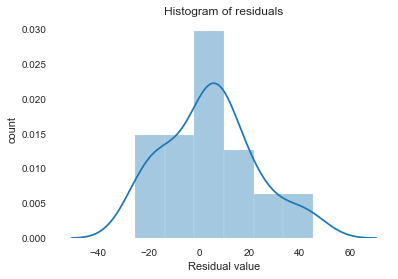

In [178]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

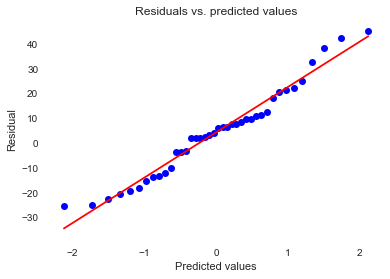

In [179]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

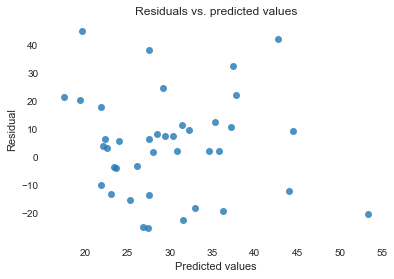

In [180]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

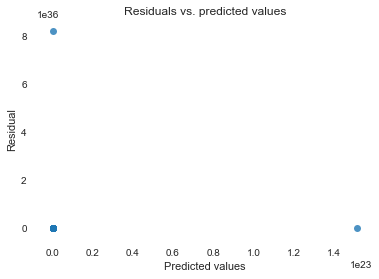

In [181]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

 #### El resultado obtenido es peor que el anterior por lo que nos quedamos con el anterior

#### Procedemos a leer el dataset de personas pero esta vez con el orden de preinscripción incluido

In [190]:
dv_personas_190411_ordenPr = pd.read_csv('./../datasets_editados/dv_personas_190411_procesada_orden_preinscripcion.csv',sep='|')

In [191]:
dv_personas_190411_ordenPr.head()

,dni,sexo,fnac,edad,num_estudios,dias_trabajados_sin_solap,id,idiomas,erasmus,num_erasmus,num_idiomas,fecha_fin_primer_estudio,dias_trabajados_fin_titulacion,tto_pcto_dias_trabajados,periodo_dias_inicio_trabajar,edad_fin_primera_titulacion,tipo_acceso,municipio_familiar,tipo_erasmus,orden_preinscripcion
0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,M,1985-11-16,32,1,510.0,109805,f,f,0,0,2008-01-08,510.0,13.0,724.0,23,Selectividad,CORIA,Ninguno,2.0
1,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,M,1990-06-22,27,1,1488.0,109806,f,f,0,0,2012-01-08,1488.0,65.0,372.0,22,Selectividad,MÉRIDA,Ninguno,NaN
2,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,M,1991-01-31,27,2,555.0,36328,f,f,0,0,2012-01-08,525.0,23.0,773.0,21,Selectividad,CÁCERES,Ninguno,1.0
3,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,M,1990-02-05,28,1,648.0,7946,f,f,0,0,2014-01-08,648.0,41.0,720.0,24,Formación Profesional,ZAFRA,Ninguno,1.0
4,001ea9744dbebe6b52a671fb1f2d508e1515b681319ad7...,M,1992-04-03,26,1,NaN,53504,f,f,0,0,2013-01-08,NaN,NaN,NaN,21,Selectividad,BADAJOZ,Ninguno,4.0


In [192]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus','municipio_familiar']
for col in categoricalCols:
    dv_personas_190411_ordenPr[col] = dv_personas_190411_ordenPr[col].astype('category')
dv_personas_190411_ordenPr.dtypes

dni                                 object
sexo                              category
fnac                                object
edad                                 int64
num_estudios                         int64
dias_trabajados_sin_solap          float64
id                                   int64
idiomas                             object
erasmus                             object
num_erasmus                          int64
num_idiomas                          int64
fecha_fin_primer_estudio            object
dias_trabajados_fin_titulacion     float64
tto_pcto_dias_trabajados           float64
periodo_dias_inicio_trabajar       float64
edad_fin_primera_titulacion          int64
tipo_acceso                       category
municipio_familiar                category
tipo_erasmus                      category
orden_preinscripcion               float64
dtype: object

In [193]:
boolCols = ['idiomas','erasmus']
for col in boolCols:
    dv_personas_190411_ordenPr[col] = dv_personas_190411_ordenPr[col].astype('bool')
dv_personas_190411_ordenPr.dtypes

dni                                 object
sexo                              category
fnac                                object
edad                                 int64
num_estudios                         int64
dias_trabajados_sin_solap          float64
id                                   int64
idiomas                               bool
erasmus                               bool
num_erasmus                          int64
num_idiomas                          int64
fecha_fin_primer_estudio            object
dias_trabajados_fin_titulacion     float64
tto_pcto_dias_trabajados           float64
periodo_dias_inicio_trabajar       float64
edad_fin_primera_titulacion          int64
tipo_acceso                       category
municipio_familiar                category
tipo_erasmus                      category
orden_preinscripcion               float64
dtype: object

In [196]:
dv_personas_190411_ordenPr.shape

(21078, 20)

In [197]:
dv_personas_190411_ordenPr = dv_personas_190411_ordenPr.dropna(subset=['tto_pcto_dias_trabajados'])

In [198]:
dv_personas_190411_ordenPr = dv_personas_190411_ordenPr.dropna(subset=['orden_preinscripcion'])

In [199]:
dv_personas_190411_ordenPr.shape

(9416, 20)

In [201]:
dv_personas_190411_ordenPr.drop('num_estudios',axis = 1, inplace = True)
dv_personas_190411_ordenPr.drop('dias_trabajados_fin_titulacion',axis = 1, inplace = True)
dv_personas_190411_ordenPr.drop('periodo_dias_inicio_trabajar',axis = 1, inplace = True)
dv_personas_190411_ordenPr.drop('dias_trabajados_sin_solap',axis = 1, inplace = True)


In [202]:
dv_personas_190411_ordenPr.columns

Index(['dni', 'sexo', 'fnac', 'edad', 'id', 'idiomas', 'erasmus',
       'num_erasmus', 'num_idiomas', 'fecha_fin_primer_estudio',
       'tto_pcto_dias_trabajados', 'edad_fin_primera_titulacion',
       'tipo_acceso', 'municipio_familiar', 'tipo_erasmus',
       'orden_preinscripcion'],
      dtype='object')

In [203]:
categoricalCols = ['sexo','idiomas','erasmus','tipo_acceso','municipio_familiar','tipo_erasmus','orden_preinscripcion','tto_pcto_dias_trabajados']
numericalCols = ['num_erasmus','num_idiomas','edad_fin_primera_titulacion','tto_pcto_dias_trabajados']

In [204]:
dv_personas_190411_ordenPr_categorical = dv_personas_190411_ordenPr[categoricalCols]
dv_personas_190411_ordenPr_categorical.head()

,sexo,idiomas,erasmus,tipo_acceso,municipio_familiar,tipo_erasmus,orden_preinscripcion,tto_pcto_dias_trabajados
0,M,True,True,Selectividad,CORIA,Ninguno,2.0,13.0
2,M,True,True,Selectividad,CÁCERES,Ninguno,1.0,23.0
3,M,True,True,Formación Profesional,ZAFRA,Ninguno,1.0,41.0
5,M,True,True,Acceso a Segundo Ciclo,BADAJOZ,Ninguno,1.0,41.0
8,M,True,True,Selectividad,ZAFRA,Ninguno,1.0,17.0


In [206]:
tto_pcto_dias_trabajados_bucket_array = np.linspace(0,100,11)
tto_pcto_dias_trabajados_bucket_array
dv_personas_190411_ordenPr_categorical['tto_pcto_dias_trabajados'] = pd.cut(dv_personas_190411_ordenPr_categorical['tto_pcto_dias_trabajados'],tto_pcto_dias_trabajados_bucket_array)
dv_personas_190411_ordenPr_categorical.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sexo,idiomas,erasmus,tipo_acceso,municipio_familiar,tipo_erasmus,orden_preinscripcion,tto_pcto_dias_trabajados
0,M,True,True,Selectividad,CORIA,Ninguno,2.0,"(10.0, 20.0]"
2,M,True,True,Selectividad,CÁCERES,Ninguno,1.0,"(20.0, 30.0]"
3,M,True,True,Formación Profesional,ZAFRA,Ninguno,1.0,"(40.0, 50.0]"
5,M,True,True,Acceso a Segundo Ciclo,BADAJOZ,Ninguno,1.0,"(40.0, 50.0]"
8,M,True,True,Selectividad,ZAFRA,Ninguno,1.0,"(10.0, 20.0]"


#### Creación de tabla de contigencia con orden de preinscripcion para la aplicación de Chi-squared

In [209]:
table_orden_preinscripcion_ttopcto = pd.crosstab(dv_personas_190411_ordenPr_categorical['orden_preinscripcion'],dv_personas_190411_ordenPr_categorical['tto_pcto_dias_trabajados'],margins= False)
print(table_orden_preinscripcion_ttopcto)

tto_pcto_dias_trabajados  (0.0, 10.0]  (10.0, 20.0]  (20.0, 30.0]  \
orden_preinscripcion                                                
1.0                              1523          1582          1412   
2.0                               254           244           189   
3.0                                88            92            55   
4.0                                51            51            36   
5.0                                42            21            20   
6.0                                23            19            11   
7.0                                12            11            11   
8.0                                 0             0             1   

tto_pcto_dias_trabajados  (30.0, 40.0]  (40.0, 50.0]  (50.0, 60.0]  \
orden_preinscripcion                                                 
1.0                                957           698           483   
2.0                                126            98            60   
3.0                          

In [210]:
stat, p, dof, expected = chi2_contingency(table_orden_preinscripcion_ttopcto)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=63
[[1.59260194e+03 1.61417758e+03 1.38643470e+03 9.60515568e+02
  6.91219606e+02 4.60280339e+02 2.96465288e+02 1.40641215e+02
  9.02980526e+01 3.03657168e+01]
 [2.23003741e+02 2.26024865e+02 1.94135218e+02 1.34495984e+02
  9.67878755e+01 6.44506546e+01 4.15124876e+01 1.96932556e+01
  1.26439652e+01 4.25195291e+00]
 [7.60887886e+01 7.71195951e+01 6.62388602e+01 4.58899769e+01
  3.30239850e+01 2.19905380e+01 1.41640444e+01 6.71933106e+00
  4.31411596e+00 1.45076466e+00]
 [4.38552096e+01 4.44493344e+01 3.81780174e+01 2.64495544e+01
  1.90339971e+01 1.26746617e+01 8.16371438e+00 3.87281329e+00
  2.48652217e+00 8.36175597e-01]
 [2.74095060e+01 2.77808340e+01 2.38612609e+01 1.65309715e+01
  1.18962482e+01 7.92166355e+00 5.10232149e+00 2.42050831e+00
  1.55407636e+00 5.22609748e-01]
 [1.75420838e+01 1.77797337e+01 1.52712070e+01 1.05798218e+01
  7.61359886e+00 5.06986467e+00 3.26548575e+00 1.54912532e+00
  9.94608868e-01 3.34470239e-01]
 [1.22794587e+01 1.24458136e+01 1.06898449e+01 7.40

In [211]:
dependent_features

['sexo',
 'tipo_acceso',
 'tipo_erasmus',
 'edad_fin_primera_titulacion',
 'tto_pcto_dias_trabajados',
 'dni']

In [212]:
dependent_features.append('orden_preinscripcion')

In [213]:
dependent_features

['sexo',
 'tipo_acceso',
 'tipo_erasmus',
 'edad_fin_primera_titulacion',
 'tto_pcto_dias_trabajados',
 'dni',
 'orden_preinscripcion']

In [215]:
dv_personas_190411_ordenPr_model = dv_personas_190411_ordenPr[dependent_features]
dv_personas_190411_ordenPr_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,orden_preinscripcion
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,2.0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1.0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,1.0
5,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,1.0
8,M,Selectividad,Ninguno,26,17.0,0035fa6215f1a2430aef6cf1c63a6116a313c456b4ae6b...,1.0


In [216]:
for titulacion in dv_uex_190401_filtrado_personas_clean.titulacion.unique():
    dv_personas_190411_ordenPr_model["Titulacion_is_"+titulacion] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [219]:
dv_personas_190411_ordenPr_model.dtypes

sexo                                                                                         category
tipo_acceso                                                                                  category
tipo_erasmus                                                                                 category
edad_fin_primera_titulacion                                                                     int64
tto_pcto_dias_trabajados                                                                      float64
                                                                                               ...   
Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO                            int64
Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO                int64
Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA       int64
Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS   

In [220]:
for dni in dv_uex_190401_filtrado_personas_clean.dni.unique():
    rows_dni_x =  dv_uex_190401_filtrado_personas_clean[dv_uex_190401_filtrado_personas_clean.dni.eq(dni)]
    titulaciones_dni_x = rows_dni_x.loc[:,['titulacion']].values
    for titulacion in titulaciones_dni_x:
        dv_personas_190411_ordenPr_model.loc[(dv_personas_190411_ordenPr_model.dni == dni),"Titulacion_is_"+titulacion] = 1

In [221]:
dv_personas_190411_ordenPr_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,M,Selectividad,Ninguno,26,17.0,0035fa6215f1a2430aef6cf1c63a6116a313c456b4ae6b...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
feather.write_dataframe(dv_personas_190411_model,'dv_personas_190411_previo_linear_regression_orden_pr')

In [223]:
pingfInfoFilePath = './dv_personas_190411_previo_linear_regression_orden_pr'
dv_personas_190411_ordenPr_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_ordenPr_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
### Meter orden de preinscripcion

In [224]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [225]:
dv_personas_190411_ordenPr_model_one_hot = pd.get_dummies(data=dv_personas_190411_ordenPr_model,columns=categoricalCols)

In [226]:
dv_personas_190411_ordenPr_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [227]:
dv_personas_190411_ordenPr_model_one_hot.drop(['dni'],axis=1,inplace = True)

### Comenzamos con Regresión Lineal

In [228]:
Features_1_2 = dv_personas_190411_ordenPr_model_one_hot.iloc[:,0:1]
Features_2_2 = dv_personas_190411_ordenPr_model_one_hot.iloc[:,2:]
labels = dv_personas_190411_ordenPr_model_one_hot['tto_pcto_dias_trabajados']

In [230]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [231]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 6.50442441e-01 -6.04846669e+00 -6.74940001e+00  1.68858487e+00
  5.69518456e-01 -3.89571360e+00  4.94051399e+00 -3.38104547e+00
 -2.26105138e+00 -2.21919478e+00  1.57176359e+00 -5.58046049e+00
  4.76077203e-01  2.35893975e+00  2.24450103e-04 -2.41093705e+00
 -6.29849463e+00 -5.08303468e+00  1.28972685e+00 -9.39624159e+00
 -5.29288899e+00 -9.33435600e+00 -6.61856788e+00 -3.10374313e+00
 -1.02840257e+01  1.08356754e+01 -1.83267773e+00 -8.91604013e+00
 -7.34514634e+00  2.51036761e+00 -8.26617200e+00  9.05044007e-01
  5.17988017e-01 -3.95729898e+00 -8.66392057e+00  6.13922719e+00
 -1.79396907e+00 -9.78713956e+00  5.56971706e+00  1.85725565e+00
 -1.25928518e+00 -4.88826254e+00  1.44400901e+00 -2.18120746e+00
 -5.05547381e+00  2.01963942e+00 -7.86284297e-01  5.30256685e-01
  9.60853749e-01  3.15635291e+00 -1.72994098e+00  9.99598748e-01
 -4.45964420e+00  8.96148700e+00 -1.18171282e+01  1.06681892e+00
 -7.44298294e+00 -7.61355451e+00  2.11585432e+00  1.80552823e+00
  6.41606149e-01 -1.2

In [232]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28) 

Mean Square Error      = 334.9294001232436
Root Mean Square Error = 18.301076474438425
Mean Absolute Error    = 14.581803881254876
Median Absolute Error  = 11.756236446318713
R^2                    = 0.050680535916658886
Adjusted R^2           = -2.0852882582708587


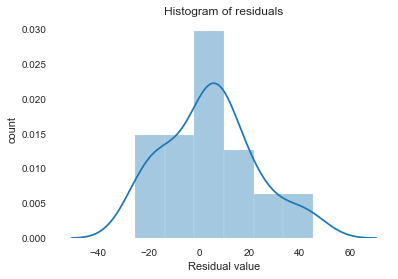

In [233]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)   

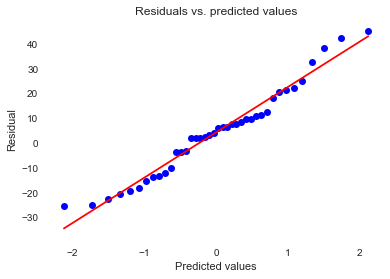

In [234]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

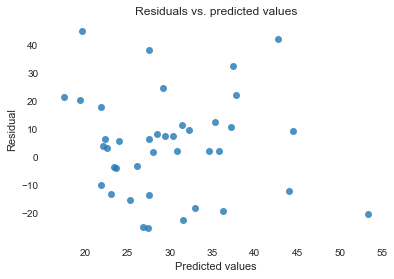

In [235]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

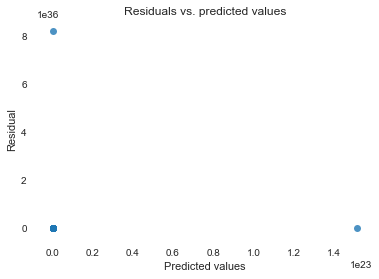

In [236]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

El análisis resultante con el orden de preinscripción ha resultado ser peor que el primero que realizamos, por lo que nos quedamos con el primero 

#### Procedemos a continuación a hacer un análisis por los diferentes tipos de estudios que existen (Grado, Máster, Doctorado, Primer y Segundo Ciclo), el primero en realizarse va a ser el de aquellas personas que hayan cursado una titulación de grado:

In [127]:
dv_personas_190411_grado = pd.read_csv('./../datasets_editados/dv_personas_190411_procesada_grado_duracion.csv',sep='|')

In [128]:
dv_personas_190411_grado.head()

,dni,sexo,fnac,edad,num_estudios,dias_trabajados_sin_solap,id,idiomas,erasmus,num_erasmus,...,fecha_fin_primer_estudio,dias_trabajados_fin_titulacion,tto_pcto_dias_trabajados,periodo_dias_inicio_trabajar,edad_fin_primera_titulacion,tipo_acceso,municipio_familiar,tipo_erasmus,orden_preinscripcion,duracion_studio
0,247413b73c47e34a595b32b3539e8caaa564d401ec23ba...,H,1993-04-13,24,2,NaN,101973,f,f,0,...,2015-01-08,NaN,NaN,NaN,22,Selectividad,BADAJOZ,Ninguno,2.0,4
1,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,M,1992-09-22,25,1,58.0,45206,f,f,0,...,2015-01-08,58.0,4.0,1120.0,23,Selectividad,MÉRIDA,Ninguno,1.0,5
2,801ff04be9a8ace5c5a5bf566bfd4fc9e02898b40cbd71...,M,1992-04-26,25,2,NaN,8042,f,f,0,...,2013-01-08,NaN,NaN,NaN,21,Selectividad,BADAJOZ,Ninguno,1.0,5
3,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,M,1993-07-05,24,2,118.0,48137,f,f,0,...,2015-01-08,118.0,10.0,375.0,22,Selectividad,BADAJOZ,Ninguno,1.0,4
4,29ac8470c5497451326061b785af434a334aa9318a9e57...,H,1994-04-19,23,1,NaN,92859,f,f,0,...,2017-01-08,NaN,NaN,NaN,23,Selectividad,CÁCERES,Ninguno,1.0,5


In [129]:
dv_personas_190411_grado.dtypes

dni                                object
sexo                               object
fnac                               object
edad                                int64
num_estudios                        int64
dias_trabajados_sin_solap         float64
id                                  int64
idiomas                            object
erasmus                            object
num_erasmus                         int64
num_idiomas                         int64
fecha_fin_primer_estudio           object
dias_trabajados_fin_titulacion    float64
tto_pcto_dias_trabajados          float64
periodo_dias_inicio_trabajar      float64
edad_fin_primera_titulacion         int64
tipo_acceso                        object
municipio_familiar                 object
tipo_erasmus                       object
orden_preinscripcion              float64
duracion_studio                     int64
dtype: object

In [130]:
boolCols = ['idiomas','erasmus']
for col in boolCols:
    dv_personas_190411_grado[col] = dv_personas_190411_grado[col].astype('bool')
dv_personas_190411_grado.dtypes

dni                                object
sexo                               object
fnac                               object
edad                                int64
num_estudios                        int64
dias_trabajados_sin_solap         float64
id                                  int64
idiomas                              bool
erasmus                              bool
num_erasmus                         int64
num_idiomas                         int64
fecha_fin_primer_estudio           object
dias_trabajados_fin_titulacion    float64
tto_pcto_dias_trabajados          float64
periodo_dias_inicio_trabajar      float64
edad_fin_primera_titulacion         int64
tipo_acceso                        object
municipio_familiar                 object
tipo_erasmus                       object
orden_preinscripcion              float64
duracion_studio                     int64
dtype: object

In [131]:
dv_personas_190411_grado.shape

(9818, 21)

In [132]:
dv_personas_190411_grado = dv_personas_190411_grado.dropna(subset=['tto_pcto_dias_trabajados'])

In [133]:
dv_personas_190411_grado.shape


(6676, 21)

In [134]:
dv_personas_190411_grado.drop('dias_trabajados_fin_titulacion',axis = 1, inplace = True)
dv_personas_190411_grado.drop('periodo_dias_inicio_trabajar',axis = 1, inplace = True)
dv_personas_190411_grado.drop('dias_trabajados_sin_solap',axis = 1, inplace = True)

In [135]:
categoricalCols = ['sexo','idiomas','erasmus','tipo_acceso','municipio_familiar','tipo_erasmus','orden_preinscripcion','tto_pcto_dias_trabajados']
numericalCols = ['num_erasmus','num_idiomas','edad_fin_primera_titulacion','tto_pcto_dias_trabajados','duracion_studio','num_estudios']

#### Procedemos a evaluar la importancia de los atributos numéricos, ya que los categóricos son los mismos de siempre y ya sabemos cuales son dependientes y cuales no 

In [136]:
dv_personas_190411_grado.head()

,dni,sexo,fnac,edad,num_estudios,id,idiomas,erasmus,num_erasmus,num_idiomas,fecha_fin_primer_estudio,tto_pcto_dias_trabajados,edad_fin_primera_titulacion,tipo_acceso,municipio_familiar,tipo_erasmus,orden_preinscripcion,duracion_studio
1,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,M,1992-09-22,25,1,45206,True,True,0,0,2015-01-08,4.0,23,Selectividad,MÉRIDA,Ninguno,1.0,5
3,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,M,1993-07-05,24,2,48137,True,True,0,0,2015-01-08,10.0,22,Selectividad,BADAJOZ,Ninguno,1.0,4
5,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,M,1991-06-12,26,1,21464,True,True,0,0,2013-01-08,12.0,22,Selectividad,MAJADAS,Ninguno,1.0,3
6,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,M,1992-06-26,25,2,47853,True,True,0,0,2014-01-08,4.0,22,Selectividad,BADAJOZ,Ninguno,1.0,4
7,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,M,1991-11-02,26,2,51867,True,True,0,0,2015-01-08,60.0,24,Selectividad,NOVELDA DEL GUADIANA,Ninguno,1.0,6


In [137]:
dv_personas_190411_grado_numerical = dv_personas_190411_grado[numericalCols]
dv_personas_190411_grado_numerical.head()

,num_erasmus,num_idiomas,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,duracion_studio,num_estudios
1,0,0,23,4.0,5,1
3,0,0,22,10.0,4,2
5,0,0,22,12.0,3,1
6,0,0,22,4.0,4,2
7,0,0,24,60.0,6,2


In [138]:
dv_personas_190411_grado_numerical_features = dv_personas_190411_grado_numerical[['num_erasmus','num_idiomas','edad_fin_primera_titulacion','duracion_studio','num_estudios']]
dv_personas_190411_grado_numerical_features.head()

,num_erasmus,num_idiomas,edad_fin_primera_titulacion,duracion_studio,num_estudios
1,0,0,23,5,1
3,0,0,22,4,2
5,0,0,22,3,1
6,0,0,22,4,2
7,0,0,24,6,2


In [139]:
dv_personas_190411_grado_numerical_label = dv_personas_190411_grado_numerical[['tto_pcto_dias_trabajados']]
dv_personas_190411_grado_numerical_label.head()

,tto_pcto_dias_trabajados
1,4.0
3,10.0
5,12.0
6,4.0
7,60.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.02710138 0.04176386 0.58298003 0.2675274  0.08062733]


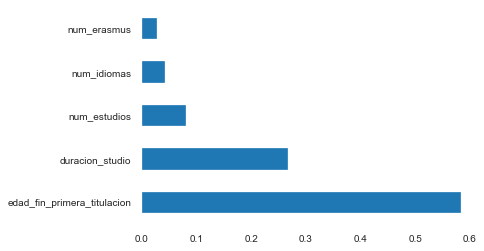

In [140]:
model = ExtraTreesClassifier()
model.fit(dv_personas_190411_grado_numerical_features,dv_personas_190411_grado_numerical_label)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=dv_personas_190411_grado_numerical_features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [143]:
dependent_features = ['sexo', 'tipo_acceso', 'tipo_erasmus', 'edad_fin_primera_titulacion','duracion_studio','tto_pcto_dias_trabajados','dni','orden_preinscripcion']
dv_personas_190411_grado_model = dv_personas_190411_grado[dependent_features]
dv_personas_190411_grado_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion
1,M,Selectividad,Ninguno,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,1.0
3,M,Selectividad,Ninguno,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,1.0
5,M,Selectividad,Ninguno,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,1.0
6,M,Selectividad,Ninguno,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,1.0
7,M,Selectividad,Ninguno,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,1.0


#### A continuación procedemos a añadir la característica de la titulación con dummies


In [144]:
for titulacion in dv_uex_190401_filtrado_personas_clean.titulacion.unique():
    dv_personas_190411_grado_model["Titulacion_is_"+titulacion] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [145]:
dv_personas_190411_grado_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
1,M,Selectividad,Ninguno,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Selectividad,Ninguno,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,M,Selectividad,Ninguno,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,M,Selectividad,Ninguno,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,M,Selectividad,Ninguno,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
for dni in dv_uex_190401_filtrado_personas_clean.dni.unique():
    rows_dni_x =  dv_uex_190401_filtrado_personas_clean[dv_uex_190401_filtrado_personas_clean.dni.eq(dni)]
    titulaciones_dni_x = rows_dni_x.loc[:,['titulacion']].values
    for titulacion in titulaciones_dni_x:
        dv_personas_190411_grado_model.loc[(dv_personas_190411_grado_model.dni == dni),"Titulacion_is_"+titulacion] = 1

In [147]:
import feather
feather.write_dataframe(dv_personas_190411_grado_model,'dv_personas_190411_previo_linear_regression_grado')

In [148]:
pingfInfoFilePath = './dv_personas_190411_previo_linear_regression_grado'
dv_personas_190411_grado_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_grado_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,M,Selectividad,Ninguno,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Selectividad,Ninguno,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Selectividad,Ninguno,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Procedemos a obtener las dummies de sexo, tipo_acceso y tipo_erasmus


In [150]:
dv_personas_190411_grado_model.drop(['orden_preinscripcion'],axis=1,inplace = True)

In [151]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [152]:
dv_personas_190411_grado_model_one_hot = pd.get_dummies(data=dv_personas_190411_grado_model,columns=categoricalCols)

In [153]:
dv_personas_190411_grado_model_one_hot.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),...,tipo_acceso_COU sin selectividad,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [154]:
dv_personas_190411_grado_model_one_hot.drop(['dni'],axis=1,inplace = True)

### Comenzamos con Regresión Lineal

In [155]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [156]:
Features_1_2 = dv_personas_190411_grado_model_one_hot.iloc[:,0:2]
Features_2_2 = dv_personas_190411_grado_model_one_hot.iloc[:,3:]
labels = dv_personas_190411_grado_model_one_hot['tto_pcto_dias_trabajados']

In [159]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[23,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  1,  0],
       [22,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,

In [160]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [161]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.46763540e-01  9.94555751e-01 -8.68519901e+00 -2.51498090e+00
  2.14291225e+00 -6.66837605e+00 -8.03633275e+00  2.78423559e+00
  1.85641556e+00 -5.75491374e+00  1.13883001e+01  8.47607492e+00
 -2.80110562e+10  6.70322643e+00  1.26965015e+01 -1.11538242e+01
  1.25578279e+01 -1.21002068e+01 -3.85700247e+00  4.53502792e+00
  7.80890405e+09 -8.05043943e+00 -2.89990379e+01 -3.14529579e+09
  1.28656539e+01 -1.35184988e+01  3.10419737e+10 -3.17574325e+00
 -1.59574798e+00  2.15706016e+10  2.04918923e+01 -1.08228664e+01
  6.86666089e-01  1.19827579e+01 -1.15751625e+01 -1.16335220e+01
  8.84588357e+00  2.20139732e+01 -1.41803110e+01 -1.99704002e+01
 -9.63588987e+00 -3.85609033e+00 -8.07848620e+00  1.30941235e+01
 -1.88705728e+09  4.23348562e+09 -5.95979524e+00  7.22758426e+00
 -5.51376051e+00  1.51963760e+09  4.94809401e+00  1.03212257e+00
  9.33297211e+08  1.21885307e+01  7.78562002e+00  6.23919501e+07
  1.79488115e+01 -8.27053027e+00 -2.61957127e+08 -8.38145935e-01
 -9.83588419e+00  6.4

In [162]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 325.7283989984232
Root Mean Square Error = 18.047947223948302
Mean Absolute Error    = 14.187991718937496
Median Absolute Error  = 11.178838592315884
R^2                    = 0.20723719600507895
Adjusted R^2           = -1.5764791129834934


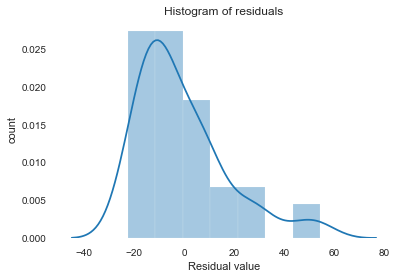

In [163]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)  

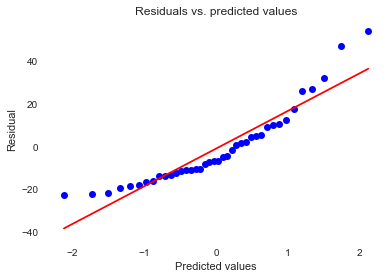

In [164]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)  

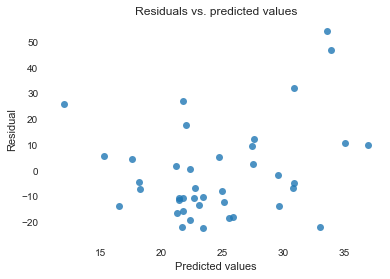

In [165]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 